<a href="https://colab.research.google.com/github/jelmerbe/ORF401/blob/main/Bowling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bowling Simulation

YOU ARE A BOWLING LEGEND


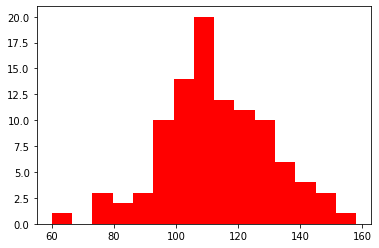

In [ ]:
import numpy as np
import math as mp
from scipy.stats import truncnorm
import matplotlib.pyplot as plt
import statistics 

#Bowlingsimulation function. with a distribution approximately normal. with an avg
# comparable to an average player (amateurs included)

def Bowlingsimulation():
  #Create arrays for all three rolls 
  Roll_1 = np.zeros(10)
  Roll_2 = np.zeros(10)
  Roll_3 = np.zeros(10)

  # function that adds bounds to normal dist. **
  def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

  #Distrubtion of Roll_1
  Dist_roll1 = get_truncated_normal(mean=7.3, sd=3, low=0, upp=11)

  #Frame 1-9 
  for i in range (10):
    Roll_1[i] = mp.floor(Dist_roll1.rvs()) #Roll 1 

    if (Roll_1[i] != 10): #Roll 2
      up = 11 - Roll_1[i] 
      Dist_roll2 = get_truncated_normal(mean=4, sd=2, low= 0, upp= up)
      Roll_2[i] = mp.floor(Dist_roll2.rvs())

  #Frame 10 
  if (Roll_1[9] == 10 ): #Strike
    Roll_2[9] = mp.floor(Dist_roll1.rvs())
    up = 10 - Roll_2[9]
    X = get_truncated_normal(mean= 7.3, sd=2, low= 0, upp= up) 
    Roll_3[9] = mp.floor(X.rvs())

  if (Roll_1[9] + Roll_2[9] == 10 and Roll_1[9] != 10): #Spare
    Roll_3[9] = mp.floor(Dist_roll1.rvs())

  ## Get absolute score, including bonus points
  pointsFrame = np.zeros(10)

  for i in range (8):
    #Open frame
    if (Roll_1[i] + Roll_2[i] <= 10): #Open
      pointsFrame[i] = Roll_1[i] + Roll_2[i]

    #Strike frame
    if (Roll_1[i] == 10): #Strike
      #bonus for no strike in following frame
      if (Roll_1[i + 1] != 10):
        Strike_bonus = Roll_1[i + 1] + Roll_2[i + 1]
      #bonus for strike in following frame
      if (Roll_1[i + 1] == 10):
        Strike_bonus = Roll_1[i+1] + Roll_1[i + 2]

      pointsFrame[i] = 10 + Strike_bonus

    #Spare frame 
    if (Roll_1[i] + Roll_2[i] == 10 and Roll_1[i] != 10): #Spare
      Spare_bonus = Roll_1[i + 1]
      pointsFrame[i] = 10 + Spare_bonus

#Bonus points for frame 9 
#Open frame
    if (Roll_1[8] + Roll_2[8] <= 10): #Open
      pointsFrame[8] = Roll_1[8] + Roll_2[8]

    #Strike frame
    if (Roll_1[8] == 10): #Strike
      #bonus for no strike in following frame
      if (Roll_1[9] != 10):
        Strike_bonus = Roll_1[9] + Roll_2[9]
      #bonus for strike in following frame
      if (Roll_1[9] == 10):
        Strike_bonus = Roll_1[9] + Roll_3[9]

      pointsFrame[8] = 10 + Strike_bonus

    #Spare frame 
    if (Roll_1[8] + Roll_2[8] == 10 and Roll_1[8] != 10): #Spare
      Spare_bonus = Roll_1[9]
      pointsFrame[8] = 10 + Spare_bonus


  pointsFrame[9] = Roll_1[9] + Roll_2[9] + Roll_3[9]

  return pointsFrame

## Create total
sum_total = np.zeros(100)

for j in range (100):
  Temp = np.zeros(10)
  Temp = Bowlingsimulation()
  
  sum = 0
  for i in range (10):
    sum = sum + Temp[i]

  sum_total[j] = sum 

# Print histogram of total scores
plt.hist(sum_total, bins = 15, color = "red") #Approximately normal
  


#** source = https://stackoverflow.com/questions/36894191/how-to-get-a-normal-distribution-within-a-range-in-numpy

#output of simulation
if (statistics.mean(sum_total) > 110):
  print("YOU ARE A BOWLING LEGEND")
  

if (statistics.mean(sum_total) < 102):
  print("THE ODDS ARE BEATING YOU")

